In [20]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 가설검정 및 통계 분석 패키지
from scipy import stats

# 선형모델 formula ( y ~ x1 + x2 + ...)
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from statsmodels.api import qqplot, add_constant

from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scale변환 -> 표준화 회귀계수 산출
## coefficient를 표준화해서 비교해본다.
from sklearn.preprocessing import StandardScaler

# 주피터 노트북 사용시 그래프 자동 출력 옵션
%matplotlib inline

matplotlib.rc('font', family = "NanumGothic")
plt.rc('font', family = "NanumGothic")
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [13]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

## 데이터 구성하기

In [14]:
df_raw = pd.read_csv("./Data/체질검사.csv", engine="python")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [15]:
df_raw_y = df_raw["FAT"]
df_raw_X = df_raw.drop("FAT", axis = 1, inplace = False)

## Ridge Regression

In [16]:
train_score = []
# alpha: 규제화 강도
para_alpha = [n_alpha * 0.1 for n_alpha in range(1, 11)]

for v_alpha in para_alpha:
    ridge = Ridge(random_state=1234, alpha = v_alpha)
    ridge.fit(df_raw_X, df_raw_y)
    train_score.append(ridge.score(df_raw_X, df_raw_y))

# 결과 저장
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainSCore"] = train_score
df_score_alpha

,Alpha,TrainSCore
0,0.1,0.749050
1,0.2,0.749050
2,0.3,0.749050
3,0.4,0.749050
4,0.5,0.749049
5,0.6,0.749049
6,0.7,0.749049
7,0.8,0.749049
8,0.9,0.749048
9,1.0,0.749048


※ 규제화 강도가 0.1일 때 train 점수가 높게 나온다.

## 최종모델

In [17]:
ridge_final = Ridge(alpha = 0.1, random_state = 1234)
result = ridge_final.fit(df_raw_X, df_raw_y)

df_ridge = pd.DataFrame()
df_ridge["variable"] = df_raw_X.columns
df_ridge["Coef"] = pd.DataFrame(result.coef_)
df_ridge

,variable,Coef
0,AGE,0.062028
1,WEIGHT,-0.088485
2,HEIGHT,-0.069638
3,NECK,-0.470754
4,CHEST,-0.023830
5,ABDOMEN,0.954786
6,HIP,-0.207502
7,THIGH,0.236117
8,KNEE,0.015231
9,ANKLE,0.173703


In [18]:
# 절편값 확인
print(result.intercept_)

-18.20613649625601


<AxesSubplot:>

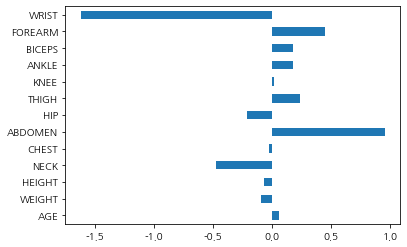

In [21]:
df_ridge_coef = pd.DataFrame({"Coef": result.coef_}, index = df_raw_X.columns)
df_ridge_coef.plot.barh(y="Coef", legend=False)

## 2. Lasso

In [24]:
train_score = []
# alpha: 규제화 강도
para_alpha = [n_alpha * 0.1 for n_alpha in range(1, 11)]

for v_alpha in para_alpha:
    lasso = Lasso(random_state=1234, alpha = v_alpha)
    lasso.fit(df_raw_X, df_raw_y)
    train_score.append(lasso.score(df_raw_X, df_raw_y))

# 결과 저장
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainSCore"] = train_score
df_score_alpha

,Alpha,TrainSCore
0,0.1,0.747998
1,0.2,0.745241
2,0.3,0.741448
3,0.4,0.736137
4,0.5,0.730741
5,0.6,0.727639
6,0.7,0.724263
7,0.8,0.722143
8,0.9,0.721207
9,1.0,0.720397


In [26]:
lasso_final = Lasso(alpha = 0.1, random_state = 1234)
result = lasso_final.fit(df_raw_X, df_raw_y)

df_lasso = pd.DataFrame()
df_lasso["variable"] = df_raw_X.columns
df_lasso["Coef"] = pd.DataFrame(result.coef_)
df_lasso

,variable,Coef
0,AGE,0.051814
1,WEIGHT,-0.098224
2,HEIGHT,-0.066683
3,NECK,-0.437469
4,CHEST,-0.001287
5,ABDOMEN,0.940655
6,HIP,-0.164923
7,THIGH,0.221392
8,KNEE,0.000000
9,ANKLE,0.076146


In [27]:
# y절편
print(result.intercept_)

-22.98260618181477


<AxesSubplot:>

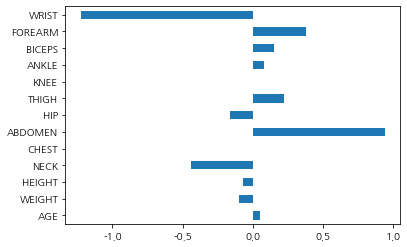

In [28]:
# 변수의 중요도 확인
df_lasso_coef = pd.DataFrame({"Coef": result.coef_}, index = df_raw_X.columns)
df_lasso_coef.plot.barh(y="Coef", legend=False)

## 3. Elastic Net

In [30]:
train_score = []
# alpha: 규제화 강도
para_alpha = [n_alpha * 0.1 for n_alpha in range(1, 11)]

for v_alpha in para_alpha:
    elastic = ElasticNet(random_state=1234, alpha = v_alpha)
    elastic.fit(df_raw_X, df_raw_y)
    train_score.append(elastic.score(df_raw_X, df_raw_y))

# 결과 저장
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainSCore"]b = train_score
df_score_alpha

,Alpha,TrainSCore
0,0.1,0.748188
1,0.2,0.746369
2,0.3,0.744264
3,0.4,0.742184
4,0.5,0.739976
5,0.6,0.737685
6,0.7,0.735334
7,0.8,0.732940
8,0.9,0.730512
9,1.0,0.728347


In [31]:
elastic = ElasticNet(alpha = 0.1, random_state = 1234)
result = elastic.fit(df_raw_X, df_raw_y)

df_elastic = pd.DataFrame()
df_elastic["variable"] = df_raw_X.columns
df_elastic["Coef"] = pd.DataFrame(result.coef_)
df_elastic

,variable,Coef
0,AGE,0.052387
1,WEIGHT,-0.097031
2,HEIGHT,-0.072548
3,NECK,-0.464105
4,CHEST,-0.008892
5,ABDOMEN,0.947577
6,HIP,-0.180995
7,THIGH,0.230140
8,KNEE,0.000000
9,ANKLE,0.099379


In [34]:
# y절편
print(result.intercept_)

-22.28187272849863


<AxesSubplot:>

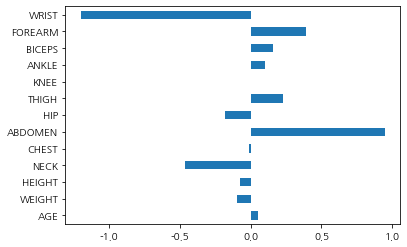

In [33]:
# 변수의 중요도 확인
df_elastic_coef = pd.DataFrame({"Coef": result.coef_}, index = df_raw_X.columns)
df_elastic_coef.plot.barh(y="Coef", legend=False)